# SET UP

In [21]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt # plotting
%matplotlib inline
import os
import pandas as pd
import shutil

# library used to process audio 
import librosa
from librosa import display
import IPython.display as ipd

plt.figure(figsize=(14,5))
DATAPATH = './archive'
dir_list = os.listdir(DATAPATH)
print(dir_list)
#print(os.listdir(os.path.join(DATAPATH,dir_list[0])))

['Actor_16', 'Actor_11', 'Actor_18', 'Actor_20', 'Actor_21', 'Actor_19', 'Actor_10', 'Actor_17', 'Actor_04', 'Actor_03', 'Actor_02', 'Actor_05', 'Actor_12', 'Actor_15', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_14', 'Actor_13', 'Actor_09', 'Actor_07', 'Actor_06', 'Actor_01', 'Actor_08']


<Figure size 1008x360 with 0 Axes>

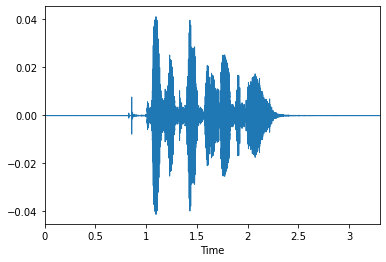

In [3]:
testpath = os.path.join(DATAPATH, "Actor_01/03-01-01-01-01-01-01.wav")
x,fs = librosa.load(testpath)
librosa.display.waveplot(x,sr=fs)
ipd.Audio(testpath)

In [17]:
test_mfccs = librosa.feature.mfcc(x,sr=fs, n_mfcc=40)
test_mfcc_scaled = np.mean(test_mfccs.T, axis=0)
print(test_mfcc_scaled)

[-6.9798419e+02  5.5228489e+01  3.2386288e-01  1.2775377e+01
  7.3961473e+00  8.6622393e-01 -3.5502758e+00 -2.8283315e+00
 -1.1305534e+01 -2.5249267e+00  4.9610454e-01 -2.7229269e+00
  1.6458004e+00 -3.4319642e+00  1.4035645e-01  1.0731596e+00
 -4.3556724e+00 -1.5837712e+00 -1.5930084e+00 -6.5936118e-01
 -6.2007332e+00 -2.6033127e-01 -2.5739806e+00 -4.2953477e+00
 -1.8979311e+00 -6.0985518e-01 -5.0588140e+00  4.4614434e-01
 -2.3297389e+00  3.1653252e-01 -2.1978140e+00 -1.9670637e+00
 -2.8553898e+00 -1.7034270e+00 -3.3283741e+00 -1.4314876e+00
 -1.1954837e+00 -1.6748066e+00 -3.5871468e+00 -1.4610064e+00]


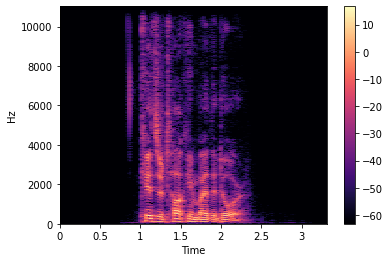

In [16]:
import matplotlib.pyplot as plt
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=fs, x_axis='time',y_axis='hz')
plt.colorbar()

# Extract Features

using MFCC to summary the frequency distribution, and use to identify features for classification

In [4]:
mfccs = librosa.feature.mfcc(y=x,sr=fs,n_mfcc=40)
print(mfccs.shape)

(40, 143)


In [5]:
def features_extractor(file):
    audio, fs = librosa.load(file, res_type="kaiser_fast")
    mfccs = librosa.feature.mfcc(y=audio, sr=fs,n_mfcc=40)
    mfcc_scaled = np.mean(mfccs.T, axis=0)
    return mfcc_scaled

In [18]:
def files_info_extractor(path):
    dir_list = os.listdir(path)
    y = []
    X = []
    for i in range(len(dir_list)):
        files = os.listdir(os.path.join(path,dir_list[i]))
        for j in range(len(files)):
            X.append([files[j],
                      int(files[j][0:2]),
                     int(files[j][3:5]),
                     int(files[j][6:8]),
                     int(files[j][9:11]),
                    int(files[j][12:14]),
                    int(files[j][15:17]),
                    int(files[j][18:20])])
    return X
info = files_info_extractor(DATAPATH)
info_df = pd.DataFrame(info, columns =["Url", 
                               'Modality', 
                               'Vocal channel',
                              'Emotion',
                              'Emotional intensity',
                              'Statement',
                              'Repetition',
                              'Actor'])


In [19]:
info_df

,Url,Modality,Vocal channel,Emotion,Emotional intensity,Statement,Repetition,Actor
0,03-01-05-01-02-01-16.wav,3,1,5,1,2,1,16
1,03-01-06-01-02-02-16.wav,3,1,6,1,2,2,16
2,03-01-06-02-01-02-16.wav,3,1,6,2,1,2,16
3,03-01-05-02-01-01-16.wav,3,1,5,2,1,1,16
4,03-01-07-01-01-01-16.wav,3,1,7,1,1,1,16
...,...,...,...,...,...,...,...,...
1435,03-01-03-02-02-02-08.wav,3,1,3,2,2,2,8
1436,03-01-03-01-01-02-08.wav,3,1,3,1,1,2,8
1437,03-01-02-02-01-01-08.wav,3,1,2,2,1,1,8
1438,03-01-02-01-02-01-08.wav,3,1,2,1,2,1,8


In [28]:
def transfer_all_images():
    actors = os.listdir(DATAPATH)
    for actor in actors:
        audios = os.listdir(os.path.join(DATAPATH,actor))
        for audio in audios:
            shutil.copy2(os.path.join(DATAPATH,actor,audio), os.path.join("audios",audio))
os.system("mkdir audios")
transfer_all_images()

In [81]:
X = []
y = []
def audioGenerator():
    for i in range(int(len(info_df))):
        X.append(features_extractor(os.path.join("audios",info_df["Url"][i])).tolist())
        y.append(info_df["Emotion"][i])

In [82]:
audioGenerator()
X

[[-545.2445678710938,
  38.0734748840332,
  -8.023162841796875,
  7.236882209777832,
  -13.688817024230957,
  -2.1579158306121826,
  -12.315373420715332,
  -7.9485859870910645,
  -14.858138084411621,
  1.7190638780593872,
  -10.00283145904541,
  -3.4454989433288574,
  -5.395871162414551,
  -3.4251720905303955,
  -7.82696008682251,
  -3.9448115825653076,
  -3.568131923675537,
  -5.906137943267822,
  -6.853532791137695,
  -1.695621132850647,
  -5.148193836212158,
  0.19922742247581482,
  -2.5821714401245117,
  0.48889631032943726,
  -3.8043220043182373,
  -1.2556471824645996,
  -1.4770537614822388,
  -2.277039051055908,
  1.6291279792785645,
  3.607785224914551,
  3.9189038276672363,
  3.469327449798584,
  -0.28129342198371887,
  0.6841195225715637,
  0.07363247126340866,
  2.6414148807525635,
  0.8383734226226807,
  1.8006761074066162,
  -0.6012480854988098,
  1.839665174484253],
 [-553.6116333007812,
  41.23348617553711,
  -9.912664413452148,
  8.587061882019043,
  -5.7376298904418945,

In [83]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
y = encoder.fit_transform(np.array(y).reshape(-1,1)).toarray()

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_rest, y_train, y_rest = train_test_split(X, y, random_state=0, test_size=0.4)
x_test, x_val, y_test, y_val = train_test_split(x_rest,y_rest,random_state=0,test_size=0.5)


In [85]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPool2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Lambda
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


def build():
    model=Sequential()
    model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(pd.DataFrame(x_train).shape[1], 1)))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

    model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

    model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

    model.add(Flatten())
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(units=8, activation='softmax'))
    model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
    return model
model = build()
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 40, 256)           1536      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 20, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_14 (Conv1D)          (None, 20, 256)           327936    
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 10, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_15 (Conv1D)          (None, 10, 128)           163968    
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 5, 128)         

In [86]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_val = np.expand_dims(x_val, axis=2)
x_train.shape, y_train.shape, x_val.shape, y_val.shape,x_test.shape, y_test.shape

((864, 40, 1), (864, 8), (288, 40, 1), (288, 8), (288, 40, 1), (288, 8))

In [87]:
history=model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
14/14 [==============================] - 1s 40ms/step - loss: 6.5467 - accuracy: 0.1134 - val_loss: 2.0802 - val_accuracy: 0.1042
Epoch 2/30
14/14 [==============================] - 0s 28ms/step - loss: 2.1145 - accuracy: 0.1238 - val_loss: 2.0800 - val_accuracy: 0.1042
Epoch 3/30
14/14 [==============================] - 0s 27ms/step - loss: 2.0853 - accuracy: 0.1319 - val_loss: 2.0794 - val_accuracy: 0.1042
Epoch 4/30
14/14 [==============================] - 0s 30ms/step - loss: 2.0777 - accuracy: 0.1319 - val_loss: 2.0788 - val_accuracy: 0.1042
Epoch 5/30
14/14 [==============================] - 0s 29ms/step - loss: 2.0769 - accuracy: 0.1319 - val_loss: 2.0781 - val_accuracy: 0.1354
Epoch 6/30
14/14 [==============================] - 0s 29ms/step - loss: 2.0759 - accuracy: 0.1424 - val_loss: 2.0775 - val_accuracy: 0.1354
Epoch 7/30
14/14 [==============================] - 0s 28ms/step - loss: 2.0752 - accuracy: 0.1424 - val_loss: 2.0769 - val_accuracy: 0.1354
Epoch 8/30
14